In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [28]:

df = pd.read_csv("C:\\Users\\joshi\\Desktop\\Advertising.csv",index_col=[0])

In [29]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
df. tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [31]:

df.shape

(200, 4)

In [32]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [33]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
TV,0
Radio,0
Newspaper,0
Sales,0


In [34]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


# Exploratory Data Analysis(EDA)

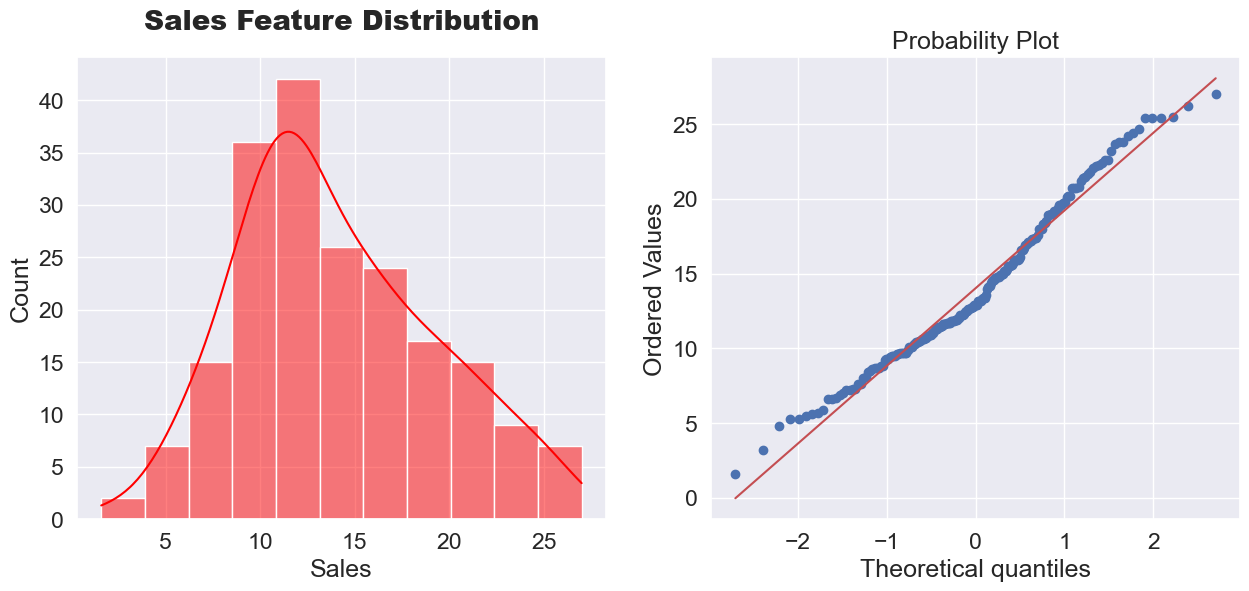

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df["Sales"],color="red",kde=True)
plt.title("Sales Feature Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
stats.probplot(df["Sales"],dist="norm",plot=pylab)
plt.show()


# observation
1. Most of the sales values are between 8-18.
2. Sales feature is having a kind on Gaussian Distribution.
3. So we don't have to perform any Transformation steps.

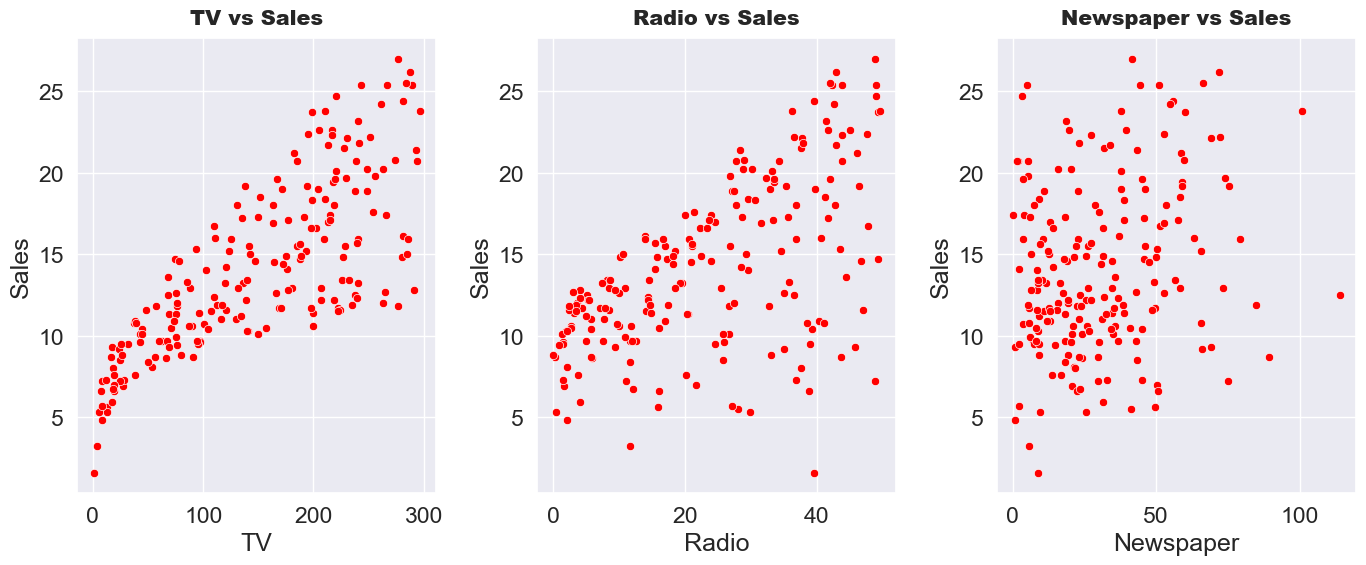

In [36]:
cols = ["TV","Radio","Newspaper"]  ## Advertising Features.
x=1

plt.figure(figsize=(14,6))
for col in cols:
    plt.subplot(1,3,x)
    sns.scatterplot(col,"Sales",data=df,color="red")
    plt.title(f"{col} vs Sales",fontweight="black",pad=10,fontsize=15)
    plt.tight_layout()
    x+=1

# observation

1.From TV vs Sales Visualization we can clearly see that the product sales is highly dependent on TV Advertisment

2.From Radio vs Sales Visualization we can say that the product sales is also dependent on Radio Advertisment but less dependency than TV Advertisment.

3.From Newspaper vs Sales Visualization we can clearly say that the Product sales is not at all dependent on Newspaper Avdertisment because all the data-points are scattered.



plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Coorelation among The Fetaures",fontweight="black",fontsize=22,pad=20)
plt.show()


# observation
1.We can observe that TV Feture is having the highest correlation with our Target feature.

2.Radio Feature is having a positive coorelation with our Target fetaure but less than TV Feature.

3.Newspaper Feature is having very less correlation with our Target feature.

# Insights
1.We can make an insight that the sales is mostly dependent on TV Advertisment & Radio Advertisment.

2.So we can drop Newspaper feature before Training our Model.


# Data Pre-Processing

In [45]:
x = df.drop(columns=["Sales","Newspaper"])
y = df[["Sales"]]

In [46]:

x.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8



y.head()

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
print(x_train.shape,y_train.shape)

(160, 2) (160, 1)


In [50]:
print(x_test.shape,y_test.shape)

(40, 2) (40, 1)


# Model Creation

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train,y_train)

LinearRegression()

In [53]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [54]:
print("Accuraacy on Training Data is: ",r2_score(y_train,train_pred)*100)

Accuraacy on Training Data is:  89.55982149747163


In [55]:
print("Accuracy on Tetsing Data is:",r2_score(y_test,test_pred)*100)

Accuracy on Tetsing Data is: 90.05833101920356


# observation
1.We can clearly observe that we got an accuracy of 89 on training data and 90 on testing data.

2.So we can conclude that our model is having a kind of best fitting.

In [56]:
#1. Mean Squared Error


mean_squared_error(y_test,test_pred)

3.1379480090683516

In [57]:
#2. Root mean squared error
rmse = 0.5**mean_squared_error(y_test,test_pred)
rmse

0.11360135837622083

In [58]:
# Mean absolute error

mean_absolute_error(y_test,test_pred)

1.444302313822758

In [59]:
# Mean absolute percentage error

mean_absolute_percentage_error(y_test,test_pred)


0.15090256196305074

# observation

1.A lower MSE & RMSE values indicates that the model will perform better while predicting future sales.

2.Similary the lower value of MAE & MAPE values indicates that the model will perform better while predicting future sales.
